# PCA (Core)
Reducción de Dimensionalidad

## Descripción:

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset “Wine Quality” disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Objetivo:

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.

# 1. Carga de datos:

  – Descarga y carga el dataset “Wine Quality” de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
  
  – El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

In [25]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('/content/1_Core_winequality-red.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 2. Exploración y preprocesamiento de datos:

  – Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
  
  – Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

In [28]:
# Verificando si hay datos nulos (%)
print("Valores nulos:")
print(df.isnull().sum() * 100 / len(df))
print("\n")

# Verificando si hay duplicados
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

Valores nulos:
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


Valores duplicados:
240




In [29]:
df.describe().round()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


In [30]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

print(uniq(df))

                                                                    val  \
feature                                                                   
fixed acidity         [7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...   
volatile acidity      [0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...   
citric acid           [0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...   
residual sugar        [1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...   
chlorides             [0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...   
free sulfur dioxide   [11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...   
total sulfur dioxide  [34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....   
density               [0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...   
pH                    [3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...   
sulphates             [0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...   
alcohol               [9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3...   
quality                  

In [31]:
# Detectar outliers en variables numéricas (no está incluida selección de columnas numéricas)
def outliers_IQR(df):
    for col in df:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1               # Interquartile range

        # Definir los límites inferior y superior de los valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚩 Outliers detected in {col}: {outliers.shape[0]}")

        # Opcional: Remover outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# ***IQR (Rango Intercuartílico)*** medida de dispersión estadística que ayuda a ID valores atípicos (outliers)

outliers_IQR(df)


🚩 Outliers detected in fixed acidity: 49

🚩 Outliers detected in volatile acidity: 19

🚩 Outliers detected in citric acid: 1

🚩 Outliers detected in residual sugar: 155

🚩 Outliers detected in chlorides: 112

🚩 Outliers detected in free sulfur dioxide: 30

🚩 Outliers detected in total sulfur dioxide: 55

🚩 Outliers detected in density: 45

🚩 Outliers detected in pH: 35

🚩 Outliers detected in sulphates: 59

🚩 Outliers detected in alcohol: 13

🚩 Outliers detected in quality: 28


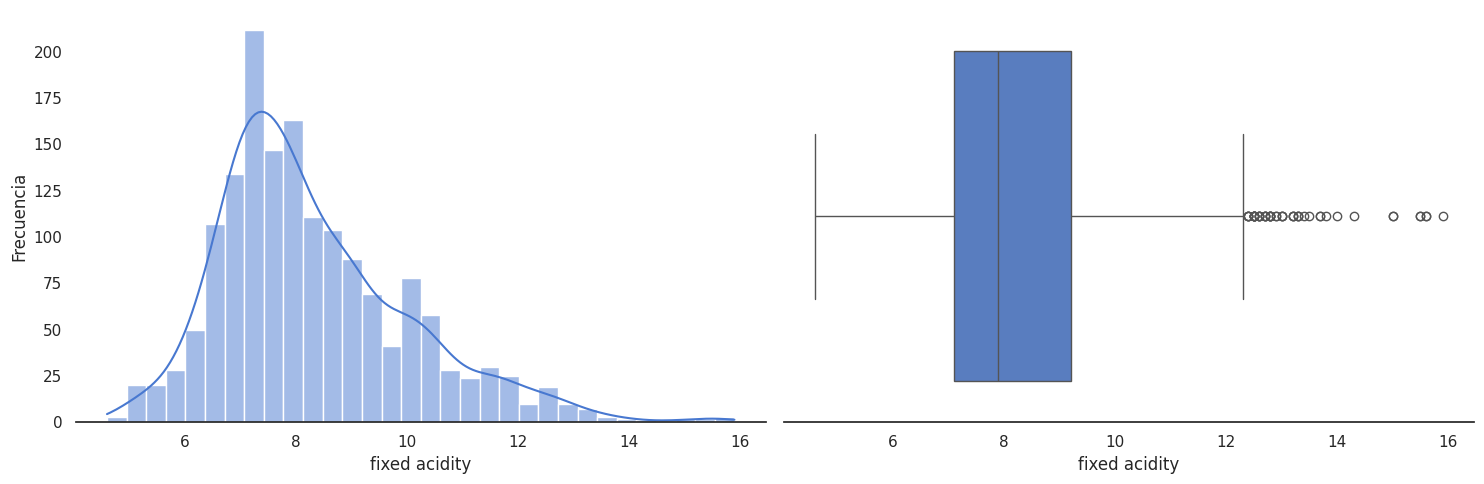

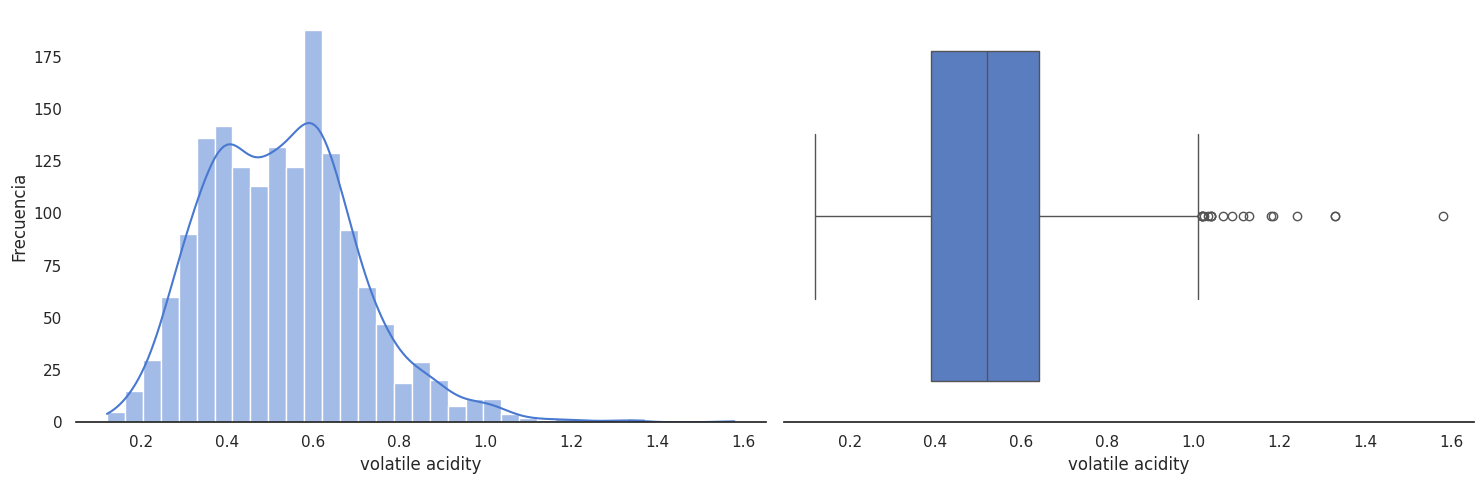

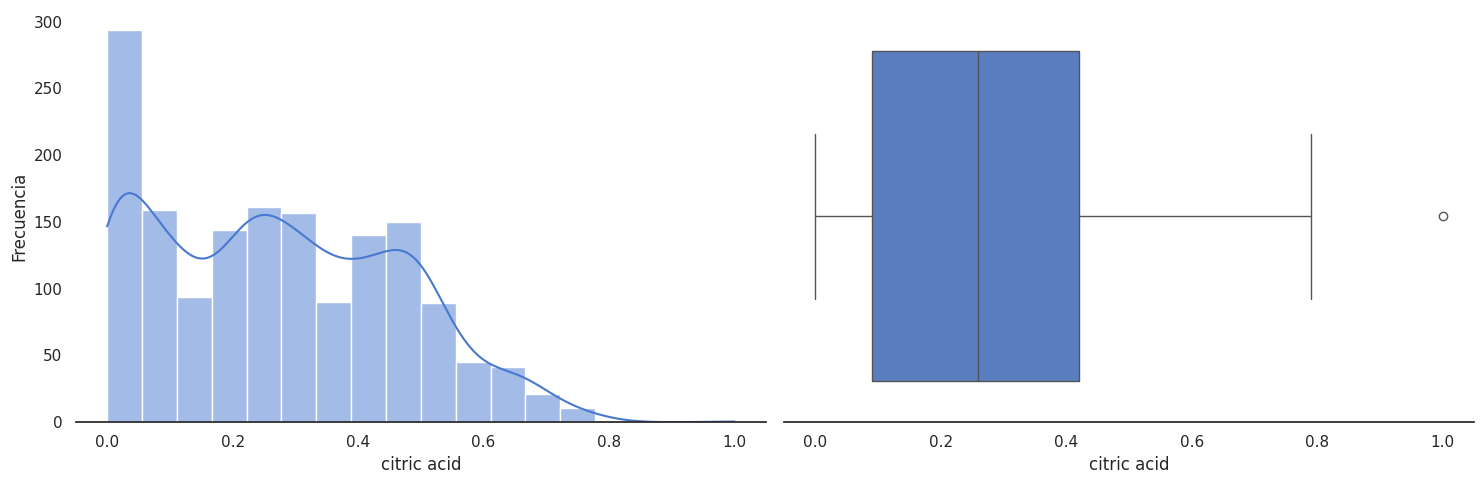

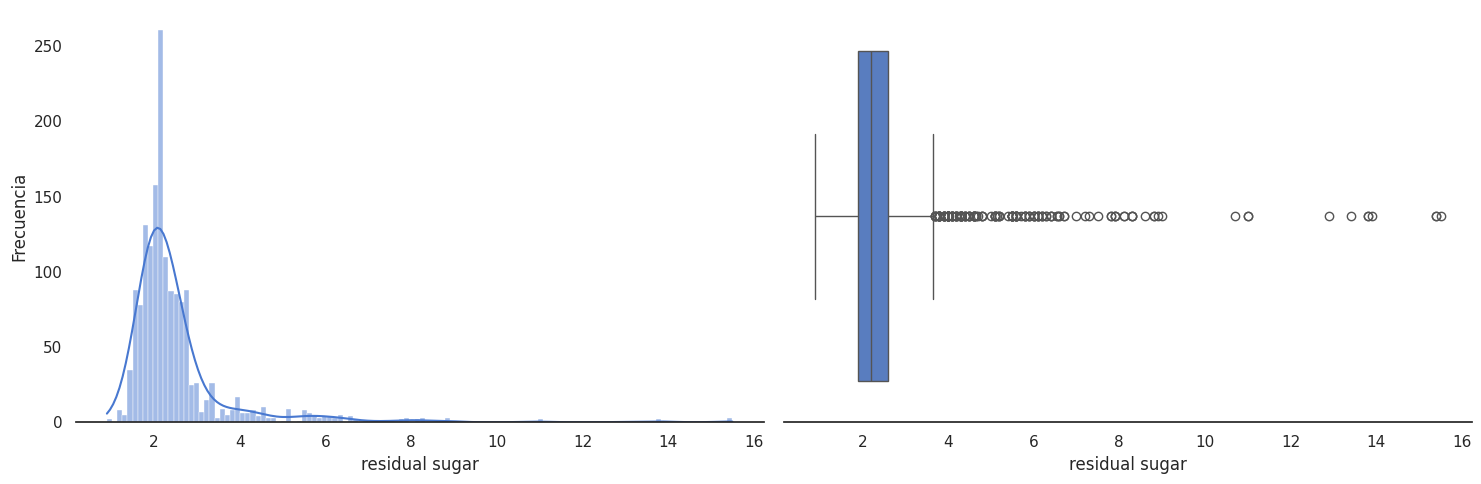

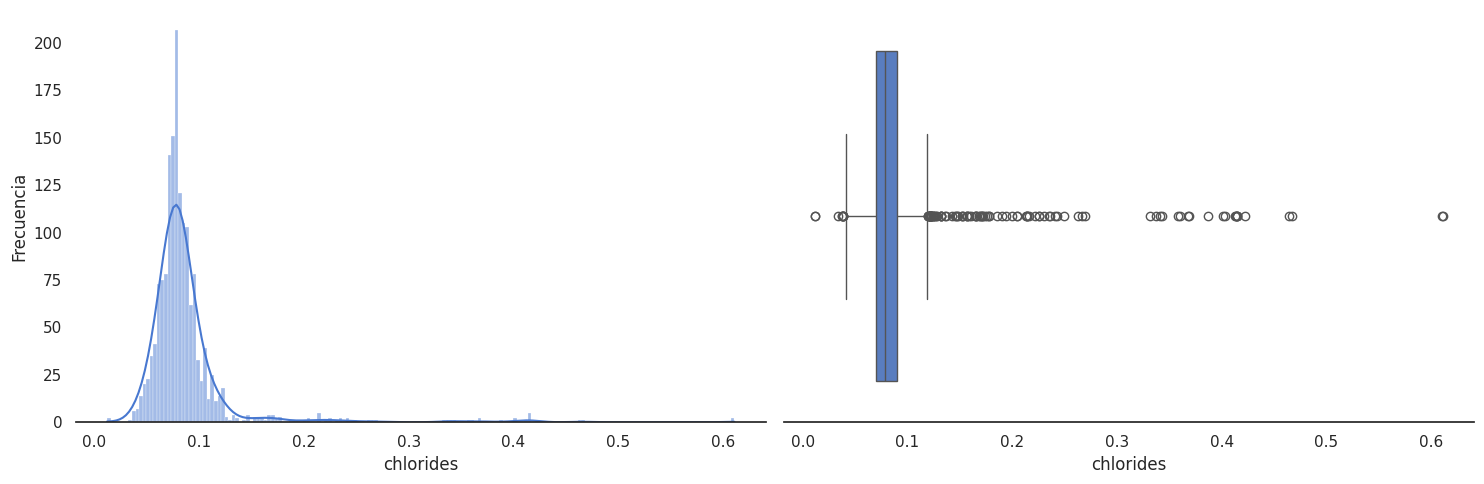

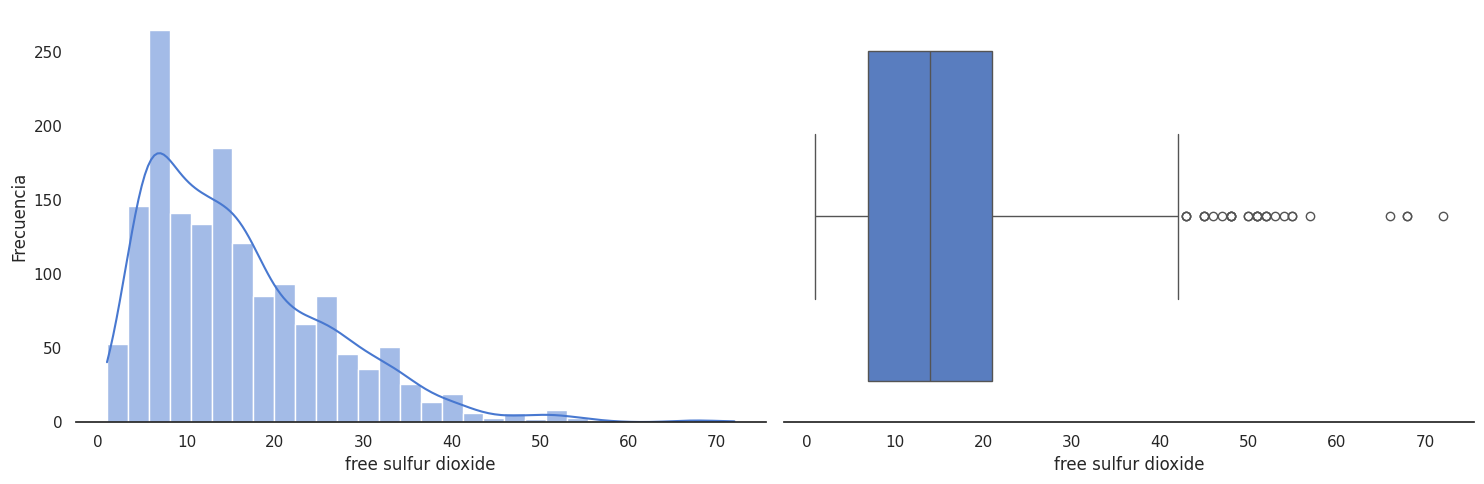

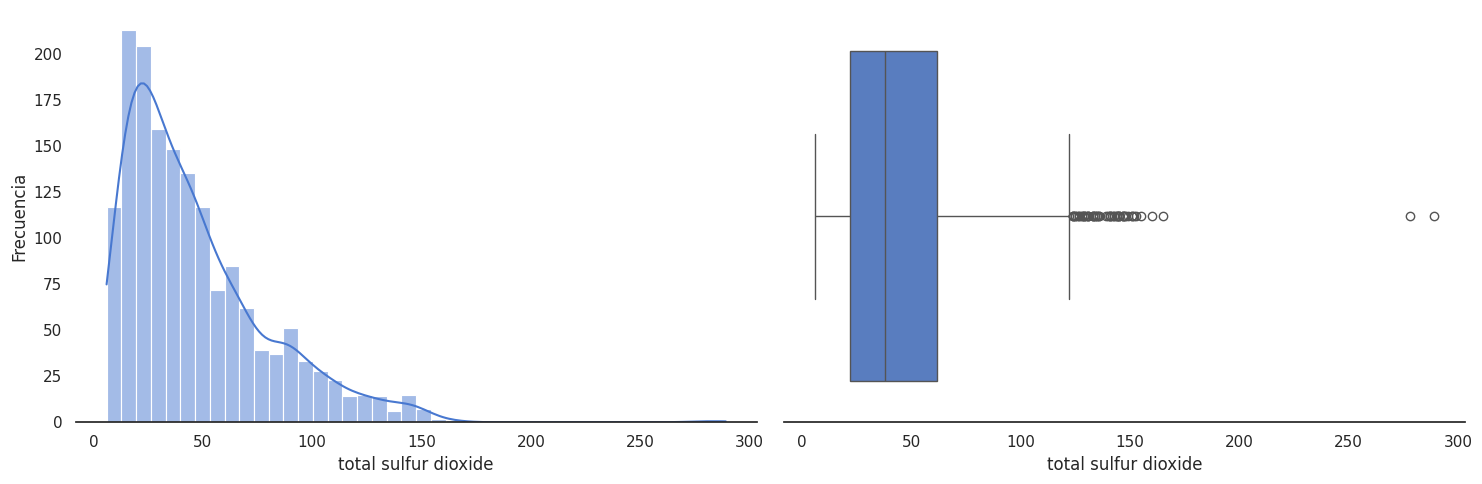

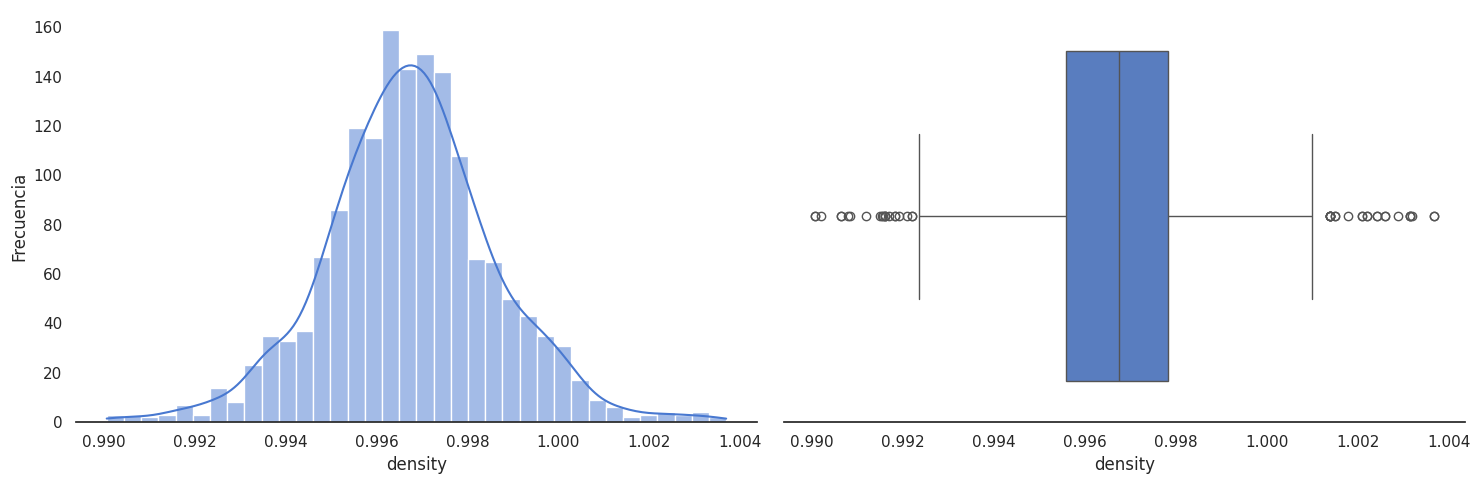

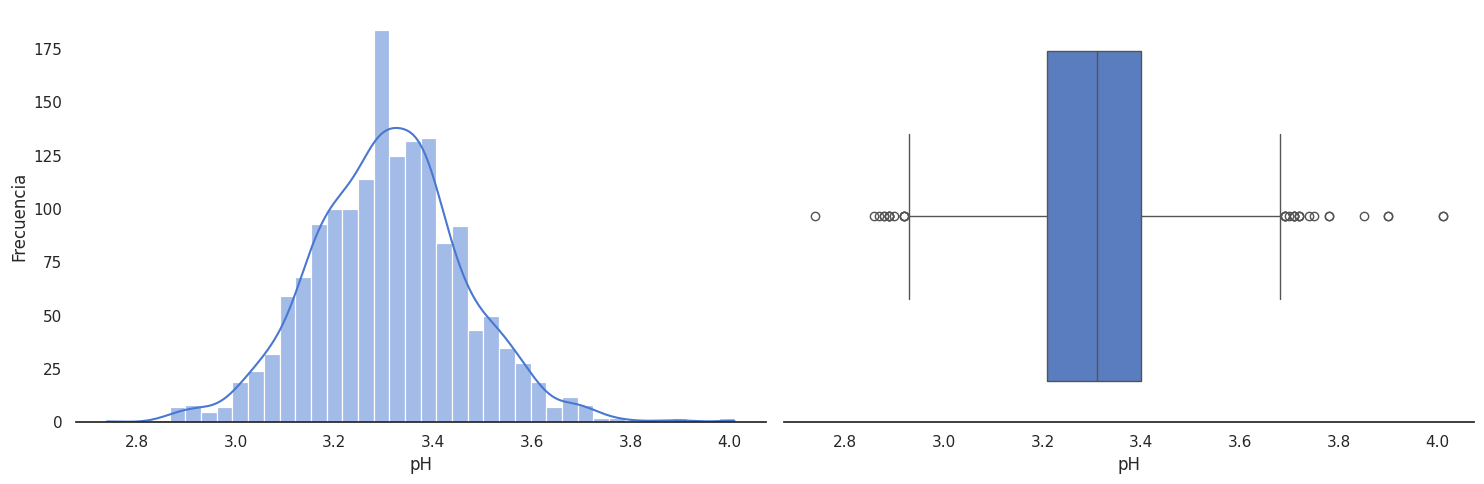

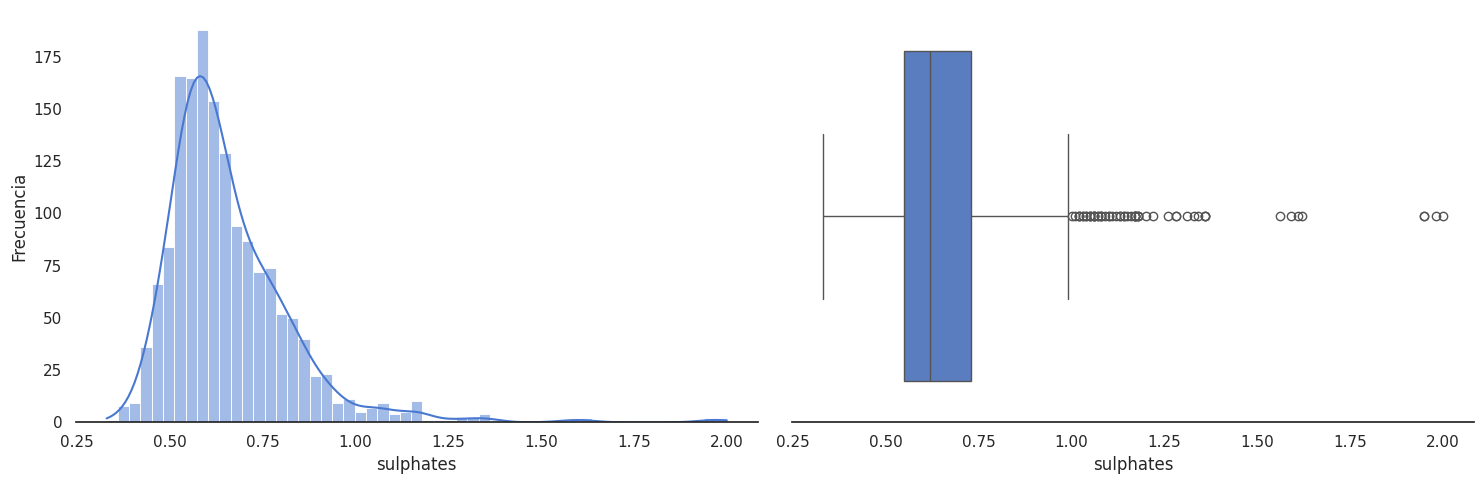

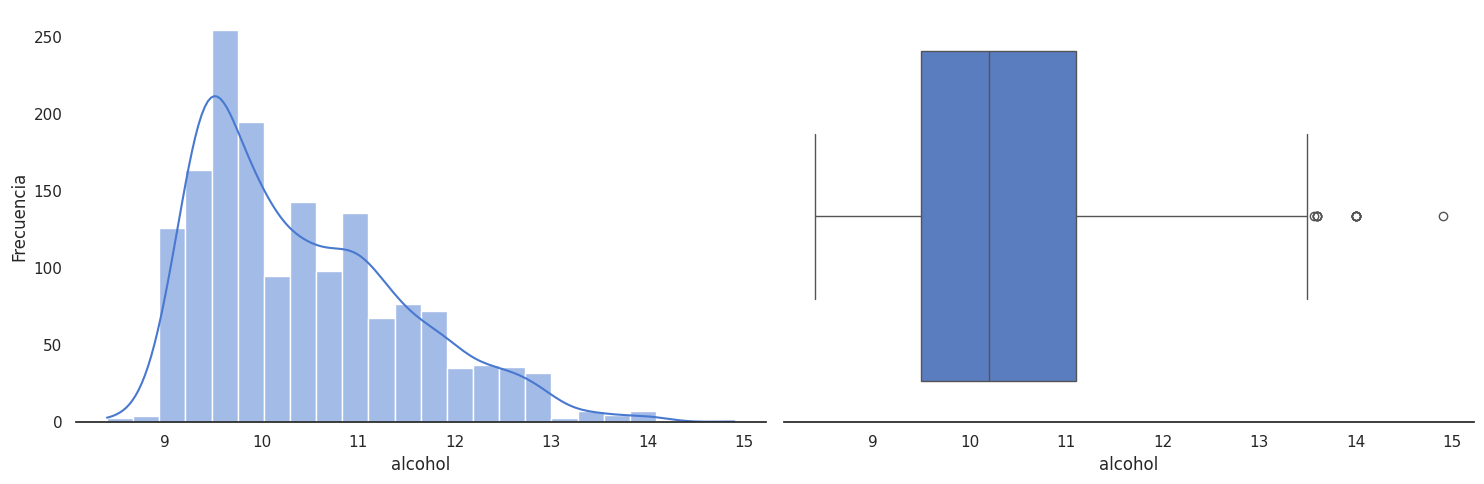

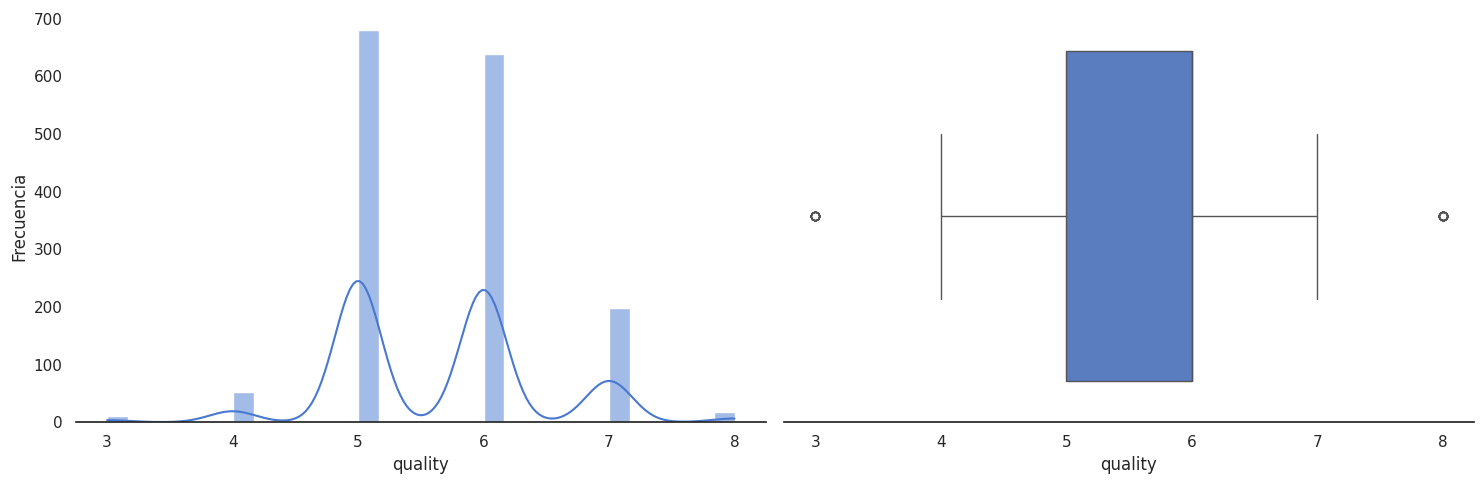

In [32]:
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

vis_hist_boxplot(df)

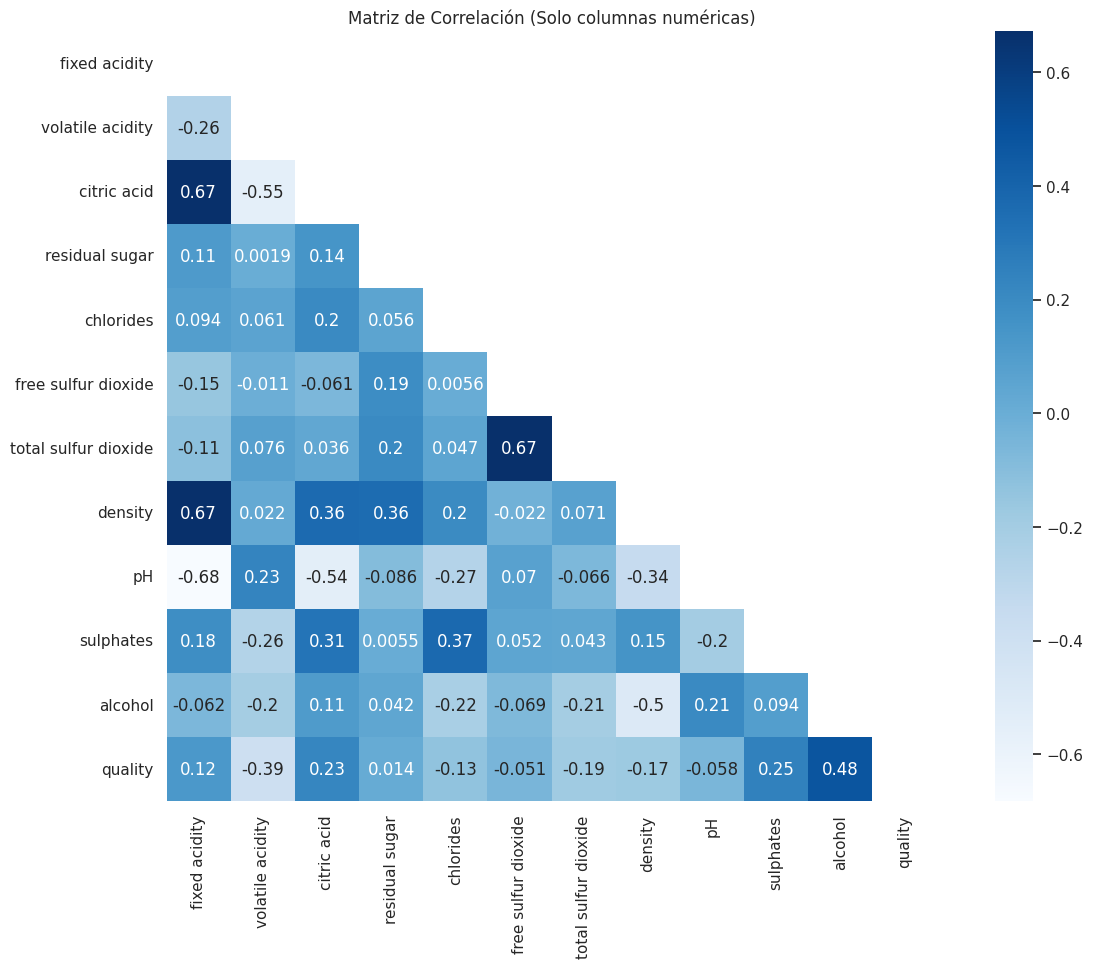

In [33]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Crear una máscara para ocultar la parte superior del triángulo
mask = np.zeros_like(df_numeric.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True

# Configurar el tamaño de la figura y graficar el heatmap
plt.figure(figsize=[15, 10])
sns.heatmap(data=df_numeric.corr(), annot=True, mask=mask, cmap='Blues', square=True)
plt.title('Matriz de Correlación (Solo columnas numéricas)')
plt.show()

In [34]:
# Define la columna objetivo para calcular las correlaciones
target_column = 'quality'

# Filtrar solo las columnas numéricas
df_r_numeric = df.select_dtypes(include=[np.number])

# Verificar que la columna objetivo esté en las columnas numéricas
if target_column not in df_r_numeric.columns:
    raise ValueError(f"La columna '{target_column}' no está en las columnas numéricas del DataFrame.")

# Calcular las correlaciones de todas las columnas con la columna objetivo
correlations = df_r_numeric.corr()[target_column].sort_values(ascending=False)

# Convertir las correlaciones a un DataFrame para una mejor visualización
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlación']

# Mostrar el DataFrame de correlaciones
print("Correlaciones con la columna:", target_column)
print(correlation_df)

Correlaciones con la columna: quality
                Variable  Correlación
0                quality     1.000000
1                alcohol     0.476166
2              sulphates     0.251397
3            citric acid     0.226373
4          fixed acidity     0.124052
5         residual sugar     0.013732
6    free sulfur dioxide    -0.050656
7                     pH    -0.057731
8              chlorides    -0.128907
9                density    -0.174919
10  total sulfur dioxide    -0.185100
11      volatile acidity    -0.390558


## Análisis EDA

Si bien se cargó y revisó el dataset considero que con lo visto hasta el momento, se requiere hacer preprocesamiento antes de aplicar PCA

Así que, se realizará a continuación estos pasos

In [35]:
# Eliminar valores nulo
df = df.dropna()

# Eliminar duplicados
df = df.drop_duplicates()

In [36]:
# Método simple usando IQR
def tratar_outliers_simple(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df[columna] = df[columna].clip(lower=limite_inferior, upper=limite_superior)
    return df

# Columnas a tratar
columnas_para_tratar = ['fixed acidity', 'volatile acidity', 'residual sugar',
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                       'density', 'pH', 'sulphates']

# Aplicar a cada columna
for columna in columnas_para_tratar:
    df = tratar_outliers_simple(df, columna)

In [37]:
outliers_IQR(df)


🚩 Outliers detected in fixed acidity: 0

🚩 Outliers detected in volatile acidity: 0

🚩 Outliers detected in citric acid: 1

🚩 Outliers detected in residual sugar: 0

🚩 Outliers detected in chlorides: 0

🚩 Outliers detected in free sulfur dioxide: 0

🚩 Outliers detected in total sulfur dioxide: 0

🚩 Outliers detected in density: 0

🚩 Outliers detected in pH: 0

🚩 Outliers detected in sulphates: 0

🚩 Outliers detected in alcohol: 12

🚩 Outliers detected in quality: 27


## Análisis Preprocesamiento

- Si bien no habían nulos, se dejá el código para eliminarlos por si las moscas, ya que estos afectan el cálculo de la matriz de covarianza

- Se eliminaron duplicados para evitar dar peso excesivo a ciertas observaciones

- Se trataron outliers con IQR con el fin de no eliminar observaciones, y tratando este tema se ayuda a que no se vayan a distorcionar los componente principales

- Si bien, la variable objetivo no se trató para outliers, la variable alcohol considero es bastante importante que modificar los outliers podría implicar pérdida de información valiosa dado el "producto final"

- Finalmente se hace la normalización de los datos en la siguiente apartado antes del próximo punto.

In [38]:
# Normalización de datos
from sklearn.preprocessing import StandardScaler

# Creamos el scaler
scaler = StandardScaler()

# Columnas a normalizar (todas excepto 'quality' que es la variable objetivo)
columnas_a_normalizar = ['fixed acidity', 'volatile acidity', 'citric acid',
                        'residual sugar', 'chlorides', 'free sulfur dioxide',
                        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Normalizamos
df_normalizado = df.copy()
df_normalizado[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])

In [39]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [40]:
df_normalizado

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.533308,0.971576,-1.393258,-0.698296,-0.288078,-0.478677,-0.391773,0.608506,1.341398,-0.654981,-0.954374,5
1,-0.292011,1.987398,-1.393258,0.454283,0.902462,0.942785,0.677343,0.051991,-0.726282,0.218684,-0.584575,5
2,-0.292011,1.310183,-1.188617,-0.039679,0.577769,-0.072545,0.256176,0.163294,-0.326086,0.000268,-0.584575,5
3,1.759013,-1.398676,1.471711,-0.698296,-0.342194,0.130521,0.450560,0.719809,-0.993080,-0.509370,-0.584575,6
5,-0.533308,0.745837,-1.393258,-0.862950,-0.342194,-0.275611,-0.197388,0.608506,1.341398,-0.654981,-0.954374,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.895254,0.520099,-0.983977,-0.698296,-0.721002,1.247384,-0.262183,-0.109399,0.741104,1.237959,-0.861924,6
1594,-1.257199,0.407230,-0.983977,-0.533642,0.469538,1.653516,-0.067799,-1.005388,0.941202,-0.509370,0.062574,5
1595,-1.438172,0.125057,-0.881656,-0.204333,-1.045695,2.364247,0.158983,-0.882955,1.408098,0.801127,0.709723,6
1597,-1.438172,0.661186,-0.779336,-0.533642,-0.342194,1.653516,-0.067799,-0.688174,1.741595,0.437100,-0.214775,5


# 3. Aplicación de PCA:

  – Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
  
  – Visualiza el gráfico de “explained variance” para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

In [41]:
# Preparar los datos
X = df_normalizado[columnas_a_normalizar]  # Variables normalizadas
y = df['quality']  # Variable objetivo

In [44]:
from sklearn.decomposition import PCA

# Crear el PCA inicial con todos los componentes posibles
pca = PCA()
pca.fit(df_normalizado[columnas_a_normalizar])

# Calcular varianza acumulada explicada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Encontrar número de componentes para 90% de varianza
n_componentes_90 = np.argmax(varianza_acumulada >= 0.9) + 1
print(f"Necesitamos {n_componentes_90} componentes para explicar el 90% de la varianza")

Necesitamos 7 componentes para explicar el 90% de la varianza


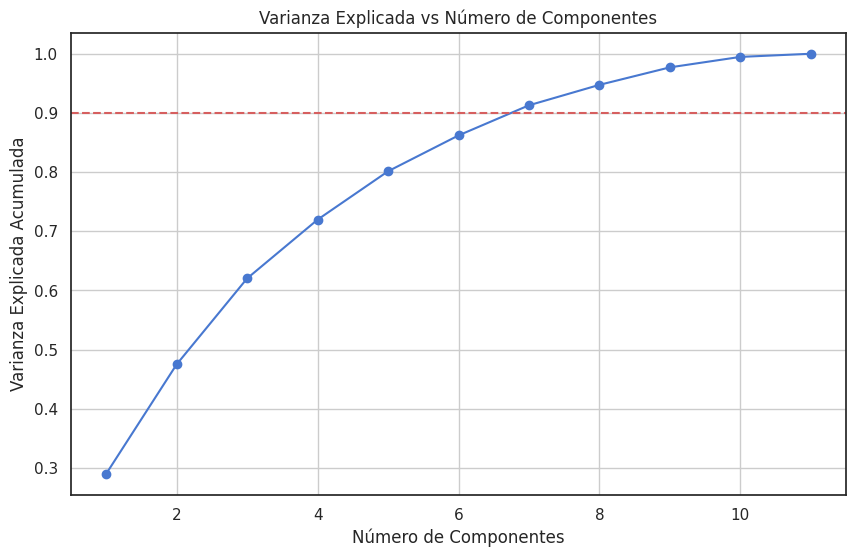

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         varianza_acumulada, 'bo-')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada vs Número de Componentes')
plt.grid(True)
plt.show()

## Análisis

Con el dataset como se ha trabajado, se puede encontrar que al hacer la reducción de dimensionalidad con PCA, el 90% de la varianza la dan 7 componentes con las 11 características revisadas en el PCA

# 4. Interpretación de los componentes principales:

  – Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.

  – Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

In [49]:
# Crear DataFrame con los coeficientes
coeficientes = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=columnas_a_normalizar
)

# Mostrar las variables más influyentes para los  componentes
print("\nVariables más influyentes en los componentes:")
for i in range(7):
    print(f"\nPC{i+1}:")
    print(coeficientes[f'PC{i+1}'].abs().sort_values(ascending=False).head())


Variables más influyentes en los componentes:

PC1:
fixed acidity    0.492915
citric acid      0.443878
pH               0.424574
density          0.415400
chlorides        0.241538
Name: PC1, dtype: float64

PC2:
total sulfur dioxide    0.464623
alcohol                 0.462608
volatile acidity        0.389564
free sulfur dioxide     0.357865
chlorides               0.296173
Name: PC2, dtype: float64

PC3:
free sulfur dioxide     0.599655
total sulfur dioxide    0.499953
volatile acidity        0.344611
sulphates               0.264449
alcohol                 0.254067
Name: PC3, dtype: float64

PC4:
residual sugar      0.800882
alcohol             0.472232
pH                  0.267077
volatile acidity    0.188552
density             0.116524
Name: PC4, dtype: float64

PC5:
sulphates         0.764182
chlorides         0.513808
pH                0.227881
fixed acidity     0.202177
residual sugar    0.183719
Name: PC5, dtype: float64

PC6:
chlorides    0.584637
density      0.479749
pH 

## Análisis
Se realizó lo solicitado al punto que se obtuvieron los componientes de manera independiente cada uno con sus respectivas variables mas influyentes.

En cuanto a que la reducción de la dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características, se debe decir que, revisando con información:

Si bien siempre hay correlación entre variables, el PCA combina las características de manera que los trabaja como componentes ortogonales (componentes principales independientes entre sí osea que no están correlacionados) eliminando la redundancia de los datos y permite trabajar con información sin solapamientos, osea eliminando la redundancia entre variables correlacionadas






# 5. Visualización y comparación:

  – Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
  
  – Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

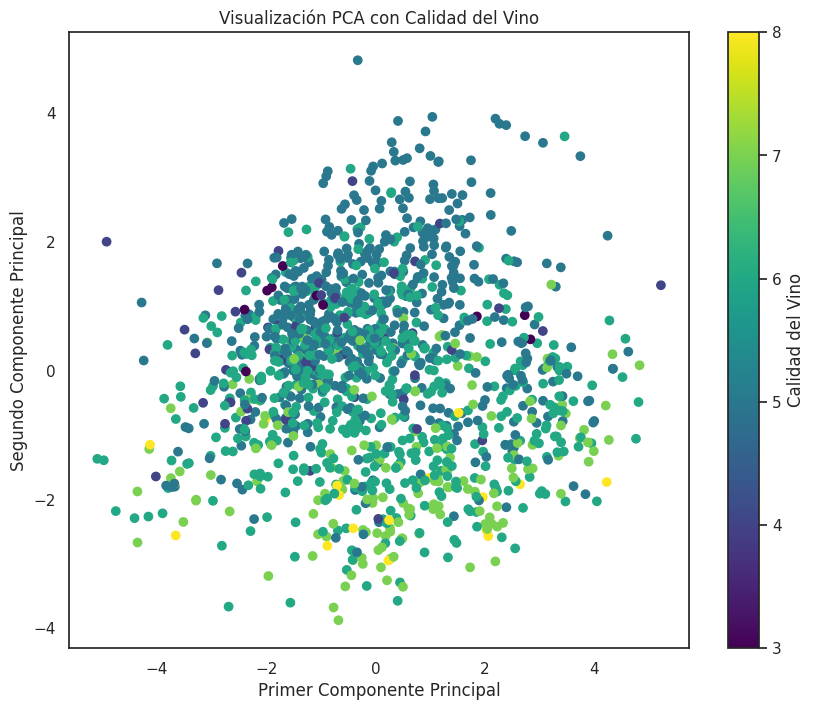

In [48]:
# Aplicar PCA con 2 componentes para visualización
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(df_normalizado[columnas_a_normalizar])

# Crear gráfico de dispersión
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df['quality'], cmap='viridis')
plt.colorbar(scatter, label='Calidad del Vino')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización PCA con Calidad del Vino')
plt.show()

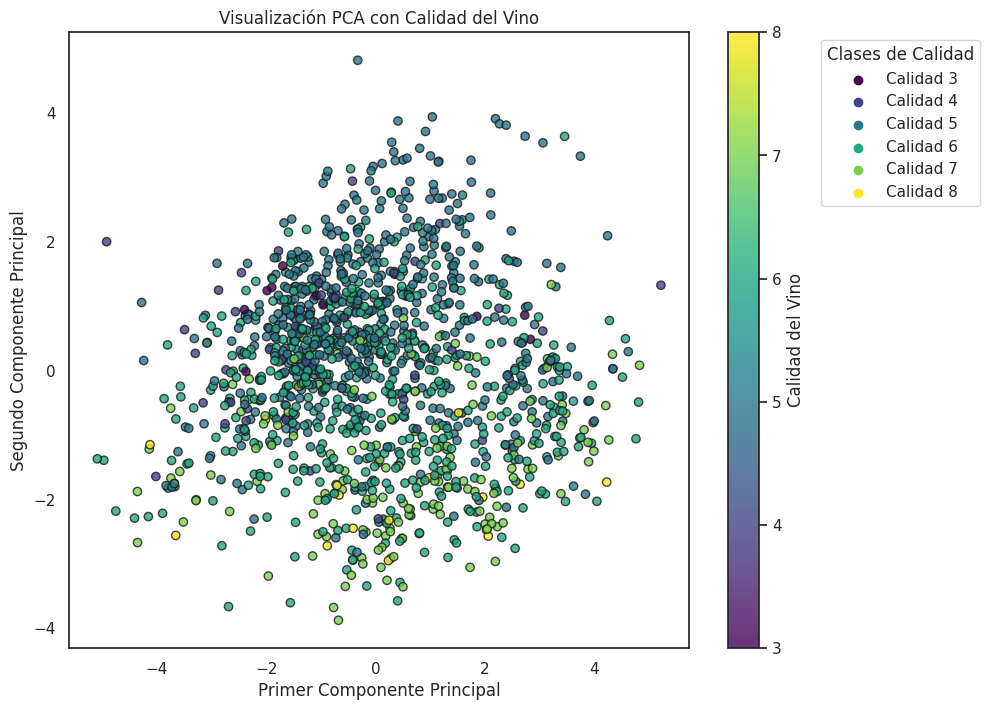

In [58]:
# Crear gráfico con leyenda de clases
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=df['quality'], cmap='viridis', alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Calidad del Vino')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualización PCA con Calidad del Vino')

# Agregar leyenda de clases únicas
clases = sorted(df['quality'].unique())
for clase in clases:
    plt.scatter([], [], label=f'Calidad {clase}', color=plt.cm.viridis((clase - min(clases)) / (max(clases) - min(clases))))
plt.legend(title='Clases de Calidad', bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()


## Análisis

Si bien se realizó el ejercicio, debido a la agrupación o a la revisión de la distribución de las clases de quality conforme a los dos primero componente principales, se ve que en general están dispersos y no es claro, por ejemplo en cuanto al PC1 cuando la variable objetivo toma valor de 3 o de 8, PC2 los separa bastante en cuanto unos hacía abajo  otros hacía arriba, respectivamente, pero en PC1 estos si se distribuyen en todos los valores, así que es interesante en como se representa estas "agrupaciones"

También es que, si vemos como se organizaron las características en estos dos componentes principales, solo tienen una variable en común, y se podría concluir cosas como:

- PC1:

    fixed acidity    0.492915

    citric acid      0.443878

    pH               0.424574

    density          0.415400

    chlorides        0.241538

        - Este parece estar asociado a la acidez y en un punto a la salinidad o incluso cuerpo (del líquido)

- PC2:

    total sulfur dioxide    0.464623

    alcohol                 0.462608

    volatile acidity        0.389564

    free sulfur dioxide     0.357865

    chlorides               0.296173
    
        - Este parece estar asociado en parte a la calidad del vino en su conservación, y en el contenido alcohólico


# Análisis de Resultados:

  – Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
  
  – Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.

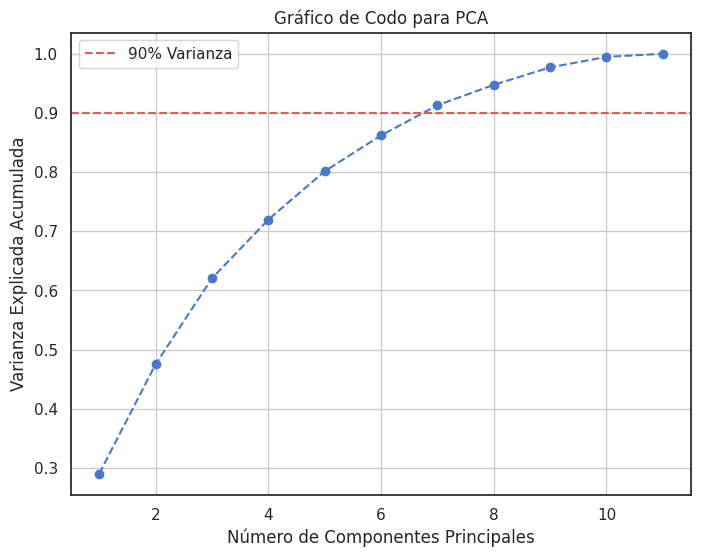

Se necesitan 7 componentes principales para capturar el 90% de la varianza.


In [65]:
# Varianza explicada por cada componente
var_explicada = pca.explained_variance_ratio_

# Varianza acumulada
var_acumulativa = np.cumsum(var_explicada)

# Graficar varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(var_acumulativa) + 1), var_acumulativa, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gráfico de Codo para PCA')
plt.grid()
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Varianza')
plt.legend()
plt.show()

# Imprimir número de componentes necesarios para capturar el 85% de la varianza
num_componentes = np.argmax(var_acumulativa >= 0.9) + 1
print(f'Se necesitan {num_componentes} componentes principales para capturar el 90% de la varianza.')


## Análisis
En este apartado se trajo a colación la gráfica revisada posteriormente para determinar el número mínimo de PC que me explican el 90% de la varianza, donde se obtiene que son 7 PC para las 11 características el resultado de esto.

A mencionar que, por ejemplo en el punto anterior, revisando solo los 2 primeros PC, se ve que ya se tenían 5 a 9 características

El reducir de 11 características a un rango entre 5 a 9, permite que se disminuya la dimensionalidad, elimine la redundancia, mejorando a su vez la eficiencia computacional, además como el PCA prioriza combinaciones de variables más relevantes para la variabilidad de datos, después de un hacer una selección de características basado en PCA se puede enfocar en patrones más importantes

# Conclusión:

  – Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.

Si bien la aplicación de PCA en este ejercicio permitió reducir la dimensionalidad de un dataset real, manteniendo la mayor parte de la información relevante.

Al identificar que un número reducido de componentes principales puede capturar un alto porcentaje de la variabilidad total, se demuestra cómo PCA simplifica el análisis al eliminar redundancias entre las variables originales.

Además, al priorizar las combinaciones de características más influyentes, PCA no solo mejora la interpretabilidad de los datos, sino que también optimiza el rendimiento de los modelos predictivos al reducir el riesgo de overfitting y disminuir la complejidad computacional.

Finalmente se ve que esta técnica es fundamental para trabajar con datasets de alta dimensionalidad en aplicaciones prácticas de machine learning y análisis exploratorio.

Pero, quedo con la duda, no sé si se resuelve en clase de, "qué sigue", porque supondría que ya se haría selección de características, pero en base a qué criterio se haría conforme a hacer la reducción de dimensionalidad, y ya después para todo lo que implica el modelado, entrenamiento y evaluación, supondría





